In [10]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

from collections import deque

## <center> Модуль 3.2 Юнит 3

In [11]:
# Создаём граф
K = nx.Graph()
K.add_edges_from([
    ('A', 'B'), 
    ('B', 'C'),
    ('B', 'D'),
    ('C', 'E'),
    ('C', 'F'),
    ('D', 'E'),
    ('E', 'F')
])

# Получаем матрицу смежности (разреженная матрица)
adjacency_matrix = nx.adjacency_matrix(K)

# Преобразуем в плотный массив и создаём датафрейм
adjacency_df = pd.DataFrame(
    adjacency_matrix.toarray(),  # преобразуем разреженную матрицу в плотный массив
    index=K.nodes(),             # строки — имена вершин
    columns=K.nodes()            # столбцы — имена вершин
)

# Выводим результат
print(adjacency_df)

   A  B  C  D  E  F
A  0  1  0  0  0  0
B  1  0  1  1  0  0
C  0  1  0  0  1  1
D  0  1  0  0  1  0
E  0  0  1  1  0  1
F  0  0  1  0  1  0


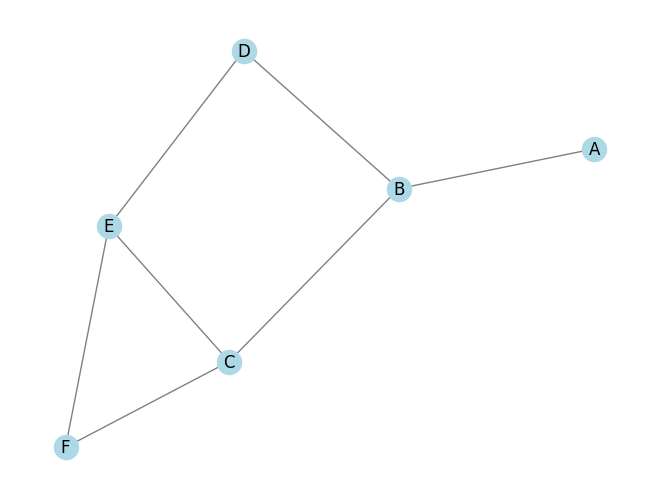

In [12]:
pos = nx.spring_layout(K, seed=42)

nx.draw(K, pos, with_labels=True, node_color='lightblue', edge_color='gray')
plt.show()

## <center> Модуль 3.2 Юнит 4 (BFS)

In [13]:
adj_list = {
    'A': ['C', 'B', 'K'], # A связана с C, B, K
    'C': ['A', 'B', 'D'], # C связана с A, B, D
    'B': ['A', 'C', 'K'], # B связана с A, C, K
    'K': ['A', 'B', 'F'], # K связана с A, B, F
    'F': ['K', 'D'],      # F связана с K, D
    'D': ['C', 'F']       # D связана с C, F
}

def bfs(graph, start_vertex):
    visited = set()  # Посещённые вершины
    queue = deque([start_vertex])  # Очередь для BFS
    levels = {start_vertex: 0}  # Уровни вершин относительно стартовой
    parents = {start_vertex: None}  # Родители вершин в дереве BFS

    while queue:
        vertex = queue.popleft()  #Извлекаем вершину и добавляем её в очередь
        visited.add(vertex)  # Помечаем её как посещённую

        for neighbor in graph[vertex]:
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append(neighbor)
                levels[neighbor] = levels[vertex] + 1
                parents[neighbor] = vertex

    return levels, parents

levels, parents = bfs(adj_list, 'A')
print('Levels:', levels)
print('Parents:', parents)

Levels: {'A': 0, 'C': 1, 'B': 1, 'K': 1, 'D': 2, 'F': 2}
Parents: {'A': None, 'C': 'A', 'B': 'A', 'K': 'A', 'D': 'C', 'F': 'K'}


## <center> Модуль 3.2 Юнит 5 (DFS)

In [14]:
def dfs(visited, graph, node, path, parents):
    if node not in visited:
        visited.add(node)  # Помечаем вершину как посещённую
        path.append(node)  # Добавляем вершину в текущий путь
        for neighbor in graph[node]:
            if neighbor not in visited:
                parents[neighbor] = node  # Запоминаем родителя для соседа
                dfs(visited, graph, neighbor, path, parents)

adj_list = {
    'A': ['B', 'C', 'K'],
    'B': ['A', 'C', 'K'],
    'C': ['A', 'B', 'D', 'F'],
    'D': ['C', 'F'],
    'F': ['K', 'D'],
    'K': ['A', 'B', 'F']
}

visited = set()
parents = {'A': None}  # Начальная вершина не имеет родителя
path = []

dfs(visited, adj_list, 'A', path, parents)

print("Итоговый путь:", path)
print("Родители:", parents)

Итоговый путь: ['A', 'B', 'C', 'D', 'F', 'K']
Родители: {'A': None, 'B': 'A', 'C': 'B', 'D': 'C', 'F': 'D', 'K': 'F'}


## <center> Модуль 3.2 Юнит 6 (Алгоритм Дейкстры)

In [15]:
#Сделан через класс graph
import sys
 
class Graph(object):
    def __init__(self, nodes, init_graph):
        self.nodes = nodes
        self.graph = self.construct_graph(nodes, init_graph)
        
    def construct_graph(self, nodes, init_graph):
        '''
        Этот метод обеспечивает симметричность графика. Другими словами, если существует путь от узла A к B со значением V, должен быть путь от узла B к узлу A со значением V.
        '''
        graph = {}
        for node in nodes:
            graph[node] = {}
        
        graph.update(init_graph)
        
        for node, edges in graph.items():
            for adjacent_node, value in edges.items():
                if graph[adjacent_node].get(node, False) == False:
                    graph[adjacent_node][node] = value
                    
        return graph
    
    def get_nodes(self):
        "Возвращает узлы графа"
        return self.nodes
    
    def get_outgoing_edges(self, node):
        "Возвращает соседей узла"
        connections = []
        for out_node in self.nodes:
            if self.graph[node].get(out_node, False) != False:
                connections.append(out_node)
        return connections
    
    def value(self, node1, node2):
        "Возвращает значение ребра между двумя узлами."
        return self.graph[node1][node2]

def dijkstra_algorithm(graph, start_node):
    unvisited_nodes = list(graph.get_nodes())
 
    # Мы будем использовать этот словарь, чтобы сэкономить на посещении каждого узла и обновлять его по мере продвижения по графику 
    shortest_path = {}
 
    # Мы будем использовать этот dict, чтобы сохранить кратчайший известный путь к найденному узлу
    previous_nodes = {}
 
    # Мы будем использовать max_value для инициализации значения "бесконечности" непосещенных узлов   
    max_value = sys.maxsize
    for node in unvisited_nodes:
        shortest_path[node] = max_value
    # Однако мы инициализируем значение начального узла 0  
    shortest_path[start_node] = 0
    
    # Алгоритм выполняется до тех пор, пока мы не посетим все узлы
    while unvisited_nodes:
        # Приведенный ниже блок кода находит узел с наименьшей оценкой
        current_min_node = None
        for node in unvisited_nodes: # Iterate over the nodes
            if current_min_node == None:
                current_min_node = node
            elif shortest_path[node] < shortest_path[current_min_node]:
                current_min_node = node
                
        # Приведенный ниже блок кода извлекает соседей текущего узла и обновляет их расстояния
        neighbors = graph.get_outgoing_edges(current_min_node)
        for neighbor in neighbors:
            tentative_value = shortest_path[current_min_node] + graph.value(current_min_node, neighbor)
            if tentative_value < shortest_path[neighbor]:
                shortest_path[neighbor] = tentative_value
                # We also update the best path to the current node
                previous_nodes[neighbor] = current_min_node
 
        # После посещения его соседей мы отмечаем узел как "посещенный"
        unvisited_nodes.remove(current_min_node)
    
    return previous_nodes, shortest_path

def print_result(previous_nodes, shortest_path, start_node, target_node):
    path = []
    node = target_node
    
    while node != start_node:
        path.append(node)
        node = previous_nodes[node]
 
   # Добавить начальный узел вручную
    path.append(start_node)
    
    print("Найден следующий лучший маршрут с ценностью {}.".format(shortest_path[target_node]))
    print(" -> ".join(reversed(path)))

#Проверка
nodes = ["Reykjavik", "Oslo", "Moscow", "London", "Rome", "Berlin", "Belgrade", "Athens"]
 
init_graph = {}
for node in nodes:
    init_graph[node] = {}
    
init_graph["Reykjavik"]["Oslo"] = 5
init_graph["Reykjavik"]["London"] = 4
init_graph["Oslo"]["Berlin"] = 1
init_graph["Oslo"]["Moscow"] = 3
init_graph["Moscow"]["Belgrade"] = 5
init_graph["Moscow"]["Athens"] = 4
init_graph["Athens"]["Belgrade"] = 1
init_graph["Rome"]["Berlin"] = 2
init_graph["Rome"]["Athens"] = 2

graph = Graph(nodes, init_graph)

previous_nodes, shortest_path = dijkstra_algorithm(graph=graph, start_node="Reykjavik")

print_result(previous_nodes, shortest_path, start_node="Reykjavik", target_node="Belgrade")

Найден следующий лучший маршрут с ценностью 11.
Reykjavik -> Oslo -> Berlin -> Rome -> Athens -> Belgrade
